high Array size 1258
low Array size 1258
open Array size 1258
close Array size 1258
[ 68.800003  69.150002  68.800003 ... 139.800003 139.710007 139.779999]
1372.0000079999998
68.60000039999998
1371.990006
68.5995003
1369.250008
68.4625004
1367.300003
68.36500015
1363.1800070000002
68.15900035000001
1359.3400030000003
67.96700015000002
1354.6700040000003
67.73350020000001
1348.610007
67.43050035
1349.340003
67.46700015
1350.480003
67.52400014999999
1350.510002
67.5255001
1351.449997
67.57249985
1352.5100019999998
67.62550009999998
1354.4499959999998
67.7224998
1358.3299929999998
67.91649964999999
1361.519996
68.0759998
1365.019996
68.2509998
1368.779991
68.43899955
1372.439995
68.62199975
1375.239998
68.7619999
1377.32
68.866
1379.8099980000002
68.9904999
1384.4899900000003
69.22449950000001
1388.779991
69.43899955
1394.3699880000004
69.71849940000001
1399.2999880000002
69.96499940000001
1405.3199929999998
70.26599965
1413.469994
70.67349970000001
1415.2199940000003
70.76099970000001
14

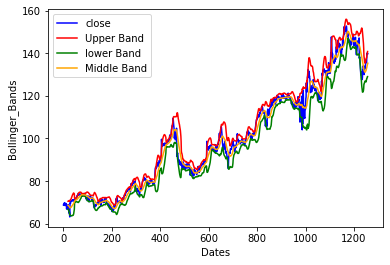

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
df = pd.read_csv('../stock_data/WMT.csv')
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
plt.ylabel('Bollinger_Bands')
plt.xlabel('Dates')
plt.legend()
plt.figure()
plt.show()
